# Importing Dataset and Necessary Libraries

In [122]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("meowmeowmeowmeowmeow/gtsrb-german-traffic-sign")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/gtsrb-german-traffic-sign


In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer,Layer,Dense,Conv2D,Flatten,Dropout,BatchNormalization
from tensorflow.keras.layers import Normalization,Dropout,Activation
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from PIL import Image
import os
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns





# Data Visualization

In [131]:
base_path = "/kaggle/input/gtsrb-german-traffic-sign"
dataset_path = os.path.join(base_path, "Meta.csv")

df = pd.read_csv(dataset_path)
print(df.head())
print(df.shape)
print(len(df))

          Path  ClassId  ShapeId  ColorId SignId
0  Meta/27.png       27        0        0   1.32
1   Meta/0.png        0        1        0   3.29
2   Meta/1.png        1        1        0   3.29
3  Meta/10.png       10        1        0   3.27
4  Meta/11.png       11        0        0   1.22
(43, 5)
43


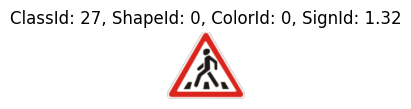

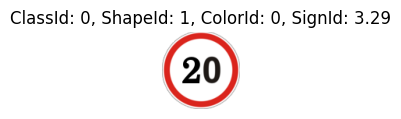

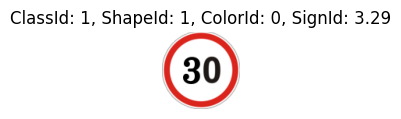

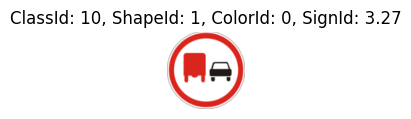

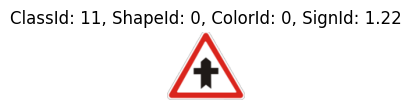

In [132]:
# Show first 5 images
for i in range(5):
    row = df.iloc[i]
    img = Image.open(f"{base_path}/{row['Path']}")
    plt.figure(figsize=(1, 2))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"ClassId: {row['ClassId']}, ShapeId: {row['ShapeId']}, ColorId: {row['ColorId']}, SignId: {row['SignId']}")
    plt.show()

# Feature Extracion and Image Resizing

In [133]:
X=df[['Path','ShapeId','ColorId','SignId' ]]
y=df['ClassId']

In [134]:
IMG_SIZE = 64
base_path = "/kaggle/input/gtsrb-german-traffic-sign/Train"

images = []
labels = []

images_per_class = 60

for class_id in sorted(os.listdir(base_path)):
    class_path = os.path.join(base_path, class_id)
    if not os.path.isdir(class_path):
        continue

    img_files = os.listdir(class_path)[:images_per_class]
    for img_file in img_files:
        img_path = os.path.join(class_path, img_file)
        try:
            img = Image.open(img_path).convert("RGB").resize((IMG_SIZE, IMG_SIZE))
            img_array = np.array(img) / 255.0
            images.append(img_array)
            labels.append(int(class_id))
        except:
            print(f"Failed to load {img_path}")


# Train-Test Split

In [135]:
X = np.array(images)
y = np.array(labels)


num_classes = len(np.unique(y))

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42)
train_y_cat = to_categorical(train_y, num_classes)
test_y_cat = to_categorical(test_y, num_classes)


# Building the Neural Network

In [136]:
model = Sequential([
    InputLayer(input_shape=(IMG_SIZE, IMG_SIZE, 3)),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)              │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 31, 31, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_32          │ (None, 6, 6, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 689,643 (2.63 MB)

 Trainable params: 689,195 (2.63 MB)

 Non-trainable params: 448 (1.75 KB)

In [137]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [140]:
train_X.shape[0]


1806

In [141]:
print(train_X.shape, train_y_cat.shape)
print(test_X.shape, test_y_cat.shape)
print(type(train_y_cat), train_y_cat.dtype)


(1806, 64, 64, 3) (1806, 43)
(774, 64, 64, 3) (774, 43)
<class 'numpy.ndarray'> float64


# Training

In [142]:
history = model.fit(train_X, train_y_cat, epochs=15 ,validation_data=(test_X, test_y_cat), batch_size=32)


Epoch 1/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 26s 298ms/step - accuracy: 0.1107 - loss: 4.4357 - val_accuracy: 0.0517 - val_loss: 3.7617
Epoch 2/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 20s 284ms/step - accuracy: 0.4053 - loss: 2.2321 - val_accuracy: 0.0891 - val_loss: 3.6488
Epoch 3/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 20s 284ms/step - accuracy: 0.6068 - loss: 1.3344 - val_accuracy: 0.0711 - val_loss: 3.5654
Epoch 4/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 25s 363ms/step - accuracy: 0.7140 - loss: 0.9309 - val_accuracy: 0.0969 - val_loss: 3.7515
Epoch 5/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 37s 286ms/step - accuracy: 0.8409 - loss: 0.5156 - val_accuracy: 0.3204 - val_loss: 2.6202
Epoch 6/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 23s 408ms/step - accuracy: 0.8783 - loss: 0.3727 - val_accuracy: 0.3618 - val_loss: 2.4891
Epoch 7/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 40s 393ms/step - accuracy: 0.9112 - loss: 0.2724 - val_accuracy: 0.5258 - val_loss: 1.6836
Epoch 8/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 18s 312ms/step - accuracy: 0.9318 - loss: 0.2067 - val_accu

# Evaluation and Visualization

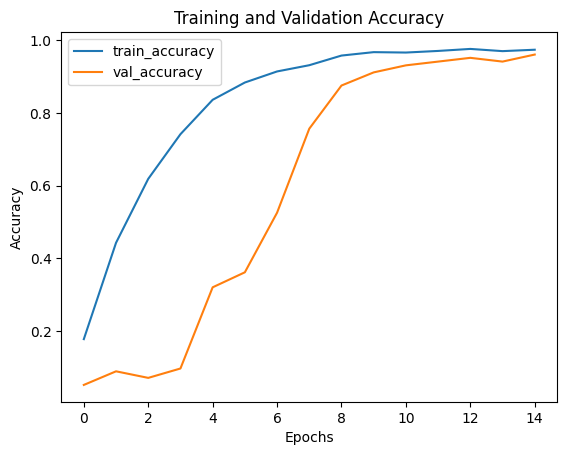

In [143]:
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Training and Validation Accuracy")
plt.show()


In [144]:
test_loss, test_acc = model.evaluate(test_X, test_y_cat)
print(f"Test accuracy: {test_acc*100:.2f}%")


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.9590 - loss: 0.1585
Test accuracy: 96.12%


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step


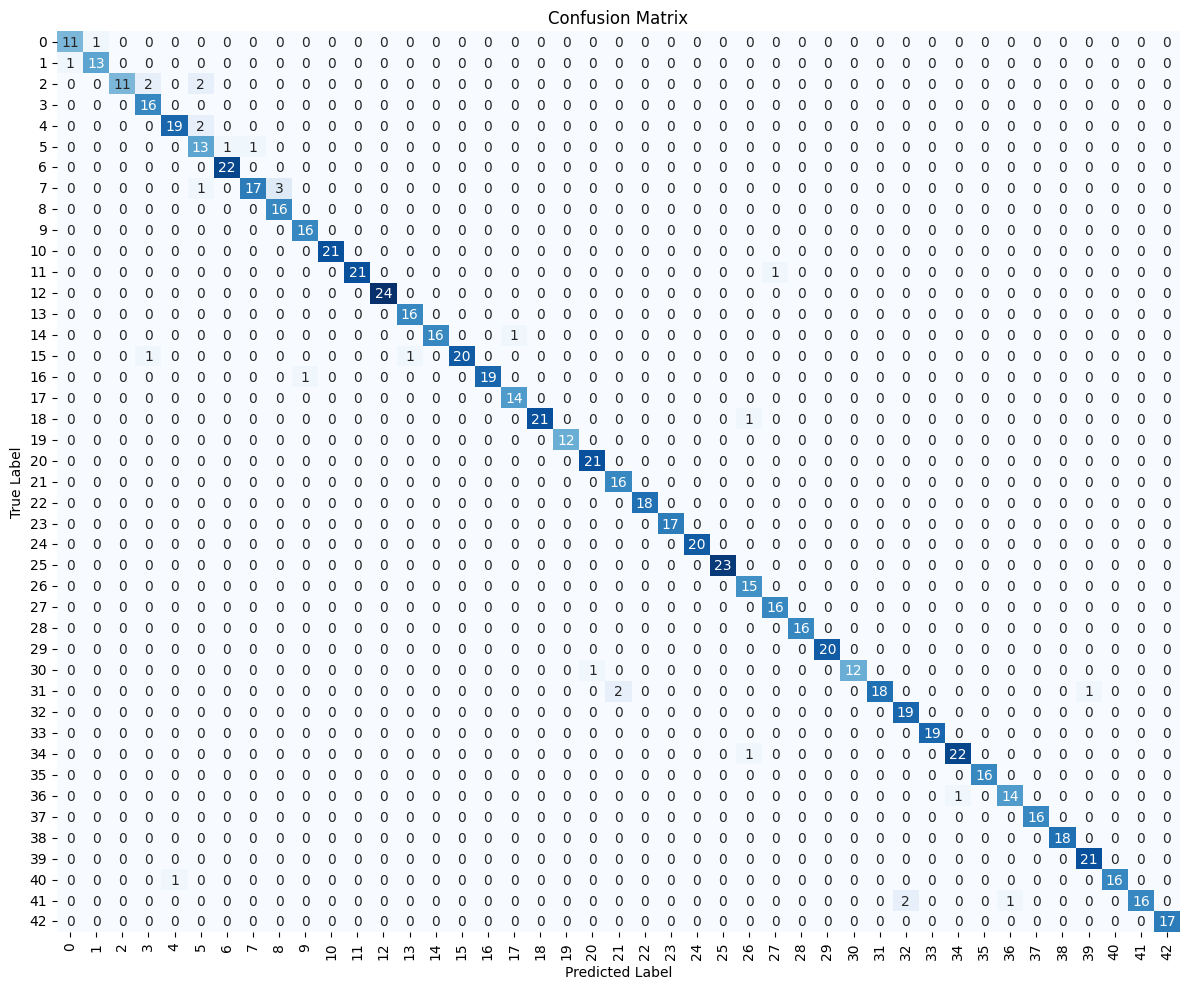

In [145]:
y_pred_probs = model.predict(test_X)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(test_y_cat, axis=1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot using seaborn for better formatting
plt.figure(figsize=(12, 10))  # You can increase size if needed
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()